# Part 2.9: Supervised Learning - k-Nearest Neighbors (k-NN)

k-Nearest Neighbors (k-NN) is a simple, non-parametric, and instance-based learning algorithm. It makes no assumptions about the underlying data distribution. It's called 'lazy' because it doesn't learn a discriminative function from the training data but 'memorizes' the entire dataset instead.

### How k-NN Works
1.  **Calculate Distances**: To classify a new data point, k-NN calculates the distance (e.g., Euclidean distance) between that point and every point in the training data.
2.  **Find Neighbors**: It identifies the 'k' nearest neighbors (the 'k' points with the smallest distances).
3.  **Vote for Class**: It assigns the new data point to the class that is most common among its k neighbors (majority vote).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate a binary classification dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# k-NN is highly sensitive to feature scales, so scaling is crucial
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Training a k-NN Model

In [2]:
# The 'n_neighbors' parameter is 'k'
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print(f"Accuracy on test set (k=5): {knn.score(X_test, y_test):.4f}")

Accuracy on test set (k=5): 0.9500


### Visualizing the Decision Boundary
The decision boundary of k-NN is non-linear and can be quite complex, adapting to the local structure of the data.

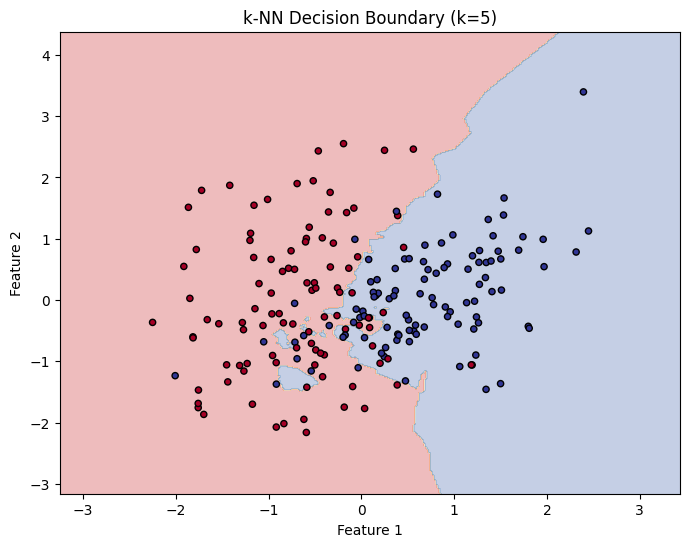

In [3]:
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title(f"k-NN Decision Boundary (k={clf.n_neighbors})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.figure(figsize=(8, 6))
plot_decision_boundary(knn, X_scaled, y)
plt.show()

### Choosing 'k'
The choice of 'k' is critical:
- **Small 'k'**: Can be sensitive to noise and lead to overfitting (a complex decision boundary).
- **Large 'k'**: Can oversmooth the decision boundary and lead to underfitting.

The optimal 'k' is usually found through cross-validation.